In [ ]:
pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 2.7 MB/s 
     |████████████████████████████████| 16.0 MB 56.4 MB/s 
     |████████████████████████████████| 40 kB 7.0 MB/s 
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 185 kB 70.0 MB/s 
     |████████████████████████████████| 145 kB 73.2 MB/s 
     |████████████████████████████████| 237 kB 69.0 MB/s 
     |████████████████████████████████| 51 kB 8.1 MB/s 
     |████████████████████████████████| 5.9 MB 41.8 MB/s 
     |████████████████████████████████| 438 kB 70.9 MB/s 
     |████████████████████████████████| 1.7 MB 57.3 MB/s 
     |████████████████████████████████| 85 kB 4.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  At

In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Activation, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow as tfjs
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.models import load_model
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
import plotly
import cv2 #OpenCV
from keras.callbacks import ModelCheckpoint
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [ ]:
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

'/content/gdrive'

In [ ]:
import pandas as pd
path = "/content/gdrive/MyDrive/Colab Notebooks/Squid"
files = os.listdir(path)
categories = []

for filename in files:
    category = filename.split('.')[0]
    if 'Non-venomouse' in category:
        categories.append("0")
    elif 'Venomous' in category:
        categories.append("1")
    else: pass
df = pd.DataFrame({
    'filename': files,
    'category': categories
})


In [ ]:
print(df.head(16))

                  filename category
0   Non-venomouse (22).jpg        0
1   Non-venomouse (10).jpg        0
2   Non-venomouse (21).jpg        0
3    Non-venomouse (8).jpg        0
4   Non-venomouse (13).jpg        0
5   Non-venomouse (11).jpg        0
6   Non-venomouse (19).jpg        0
7   Non-venomouse (15).jpg        0
8    Non-venomouse (9).jpg        0
9   Non-venomouse (14).jpg        0
10  Non-venomouse (20).jpg        0
11   Non-venomouse (3).jpg        0
12  Non-venomouse (17).jpg        0
13  Non-venomouse (16).jpg        0
14  Non-venomouse (12).jpg        0
15  Non-venomouse (29).jpg        0


In [ ]:
class_name = [ 'Non-Venomouse Squid','Venomous Squid']

In [ ]:
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import img_to_array

#path = "/content/drive/MyDrive/Colab Notebooks/img_dataset"
#files = os.listdir(path)

X =  np.empty([0]) #attribute
y = np.empty([0]) #คำเฉลย
for filename in files:
    print(path+"/"+filename)
    # load the image
    img = load_img(path+"/"+filename)

    #print(type(img))
    #print(img.format)
    #print(img.mode)
    print(img.size)
    img.show()


     # convert to numpy array
    img_array = img_to_array(img)

    X = np.append (X,img_array)
    category = filename.split('.')[0]
    if 'Non-venomouse' in category:
        y = np.append(y,[0])
    elif 'Venomous' in category:
        y = np.append(y,[1])
    else: pass

/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (22).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (10).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (21).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (8).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (13).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (11).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (19).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (15).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (9).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (14).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (20).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squid/Non-venomouse (3).jpg
(200, 200)
/content/gdrive/MyDrive/Colab Notebooks/Squ

In [ ]:
X = X.reshape(len(y),200,200,3)
x_vector = 200*200*3

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify = y)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

print(type(X_train))
print(type(y_train))

len_train  = len(X_train)
len_test = len(X_test)

X_train shape (160, 200, 200, 3)
y_train shape (160,)
X_test shape (40, 200, 200, 3)
y_test shape (40,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


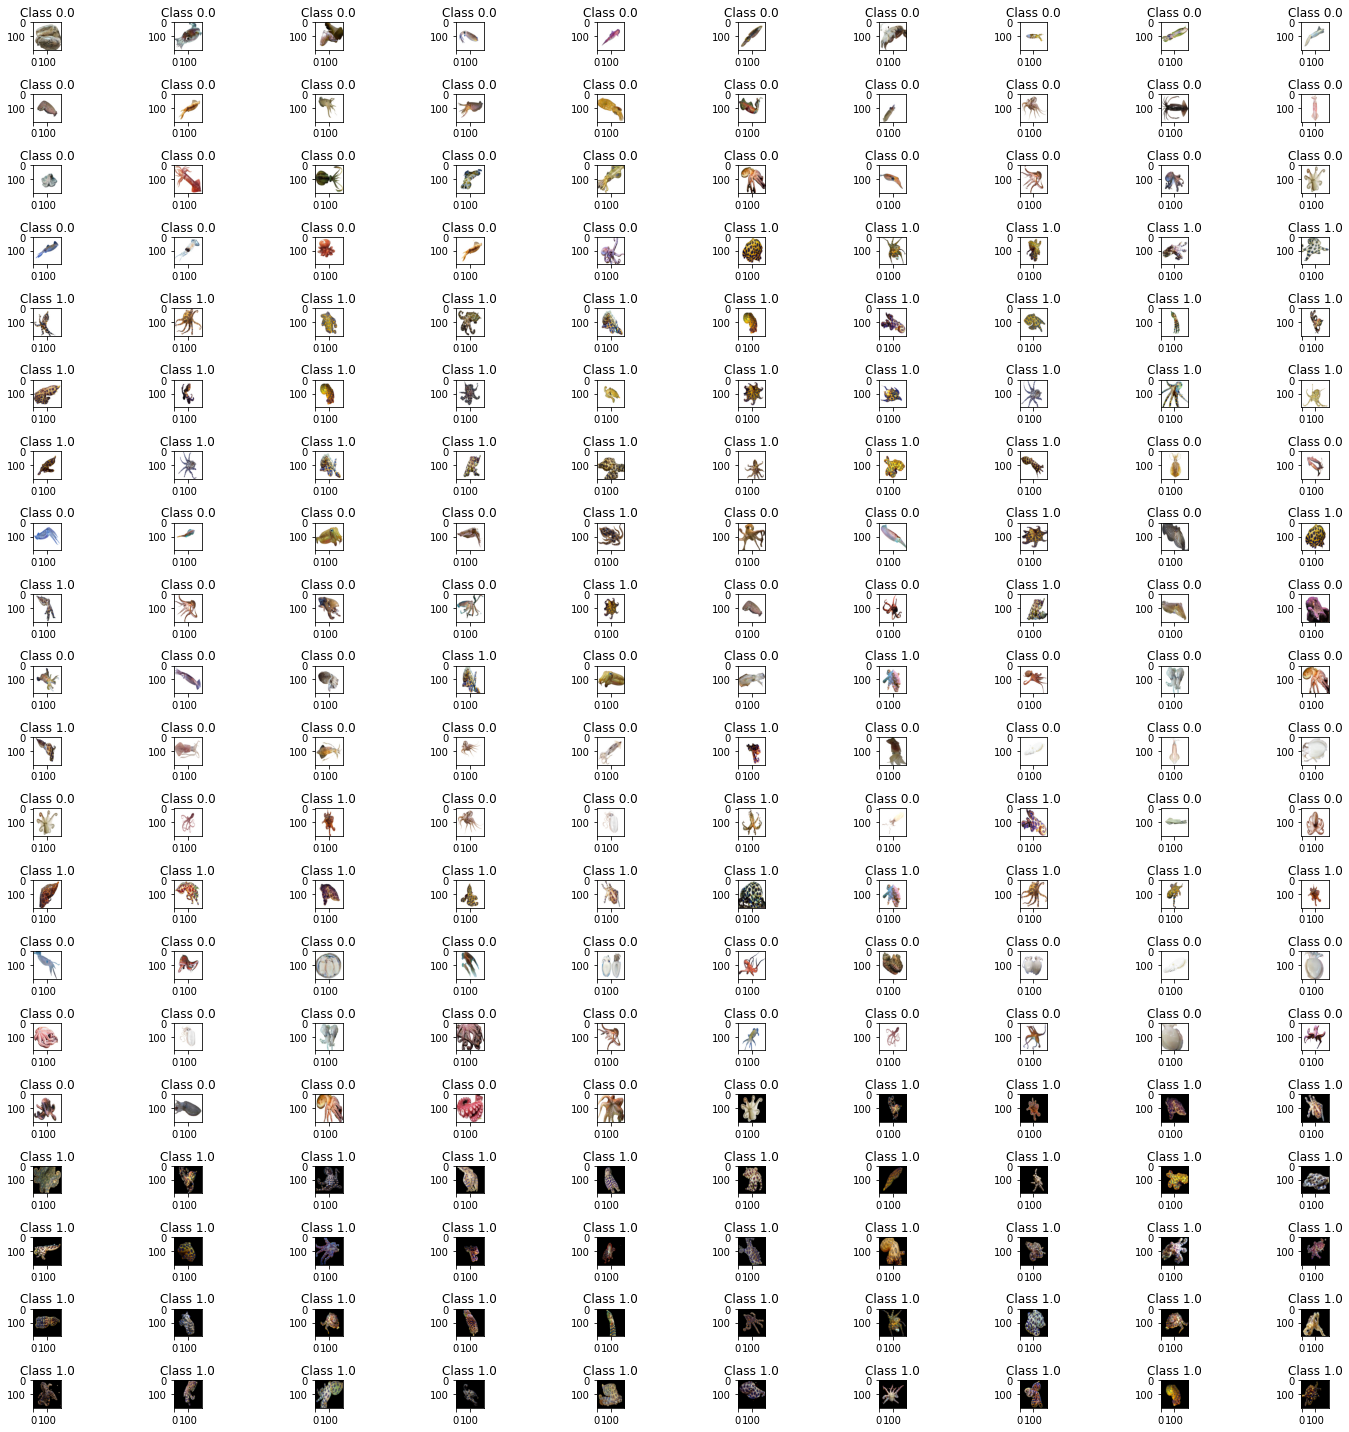

In [ ]:
plt.rcParams['figure.figsize'] = (20,20) # change figure size to plot graph

for i in range(200):
    plt.subplot(20,10,i+1)
    img_array = X[i]
    plt.imshow(np.uint8(img_array))
    plt.title("Class {}".format(y[i]))

plt.tight_layout()

In [ ]:
from keras.utils import np_utils
nb_classes = 2 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
X_train= X_train / 255.0

X_test = X_test / 255.0

In [ ]:
print(X_train.shape)

(160, 200, 200, 3)


In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

model = Sequential()
# Add convolution 2D
model.add(Conv2D(128, kernel_size=(3,3),
                 activation='relu',
                 padding='same',
                 input_shape=(200,200, 3)))
model.add(MaxPooling2D((3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(64,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(32,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 66, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [ ]:
model.compile(optimizer='adam',  loss='binary_crossentropy',  metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=20, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
8/8 [==============================] - 10s 96ms/step - loss: 0.7312 - accuracy: 0.5875 - val_loss: 0.6158 - val_accuracy: 0.7250
Epoch 2/10
8/8 [==============================] - 0s 47ms/step - loss: 0.5816 - accuracy: 0.7563 - val_loss: 0.5023 - val_accuracy: 0.7500
Epoch 3/10
8/8 [==============================] - 0s 50ms/step - loss: 0.4432 - accuracy: 0.8375 - val_loss: 0.3282 - val_accuracy: 0.8500
Epoch 4/10
8/8 [==============================] - 0s 54ms/step - loss: 0.3239 - accuracy: 0.8313 - val_loss: 0.5113 - val_accuracy: 0.8000
Epoch 5/10
8/8 [==============================] - 0s 53ms/step - loss: 0.3128 - accuracy: 0.8687 - val_loss: 0.4260 - val_accuracy: 0.8250
Epoch 6/10
8/8 [==============================] - 0s 45ms/step - loss: 0.2834 - accuracy: 0.8875 - val_loss: 0.2388 - val_accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 0s 49ms/step - loss: 0.2374 - accuracy: 0.9062 - val_loss: 0.4917 - val_accuracy: 0.8000
Epoch 8/10
8/8 [==========

In [ ]:
score_train = model.evaluate(X_train, y_train, verbose = 0)
print('Train loss : ', score_train[0])
print('Train accuracy : ',score_train[1])

Train loss :  0.07541117072105408
Train accuracy :  0.9750000238418579


In [ ]:
score_test = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss : ', score_test[0])
print('Test accuracy : ', score_test[1])

Test loss :  0.22925439476966858
Test accuracy :  0.925000011920929


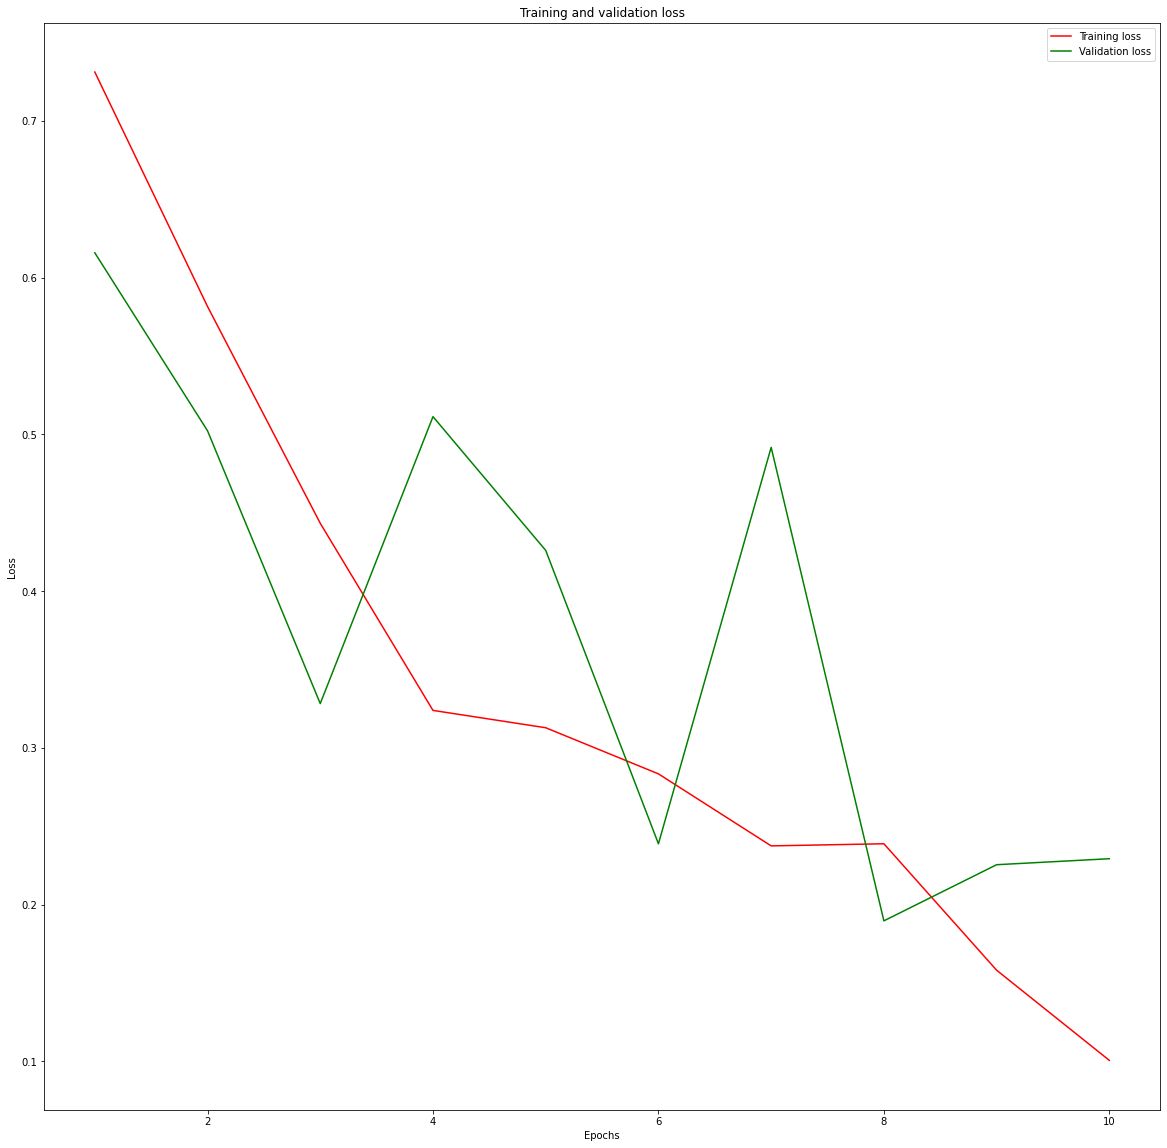

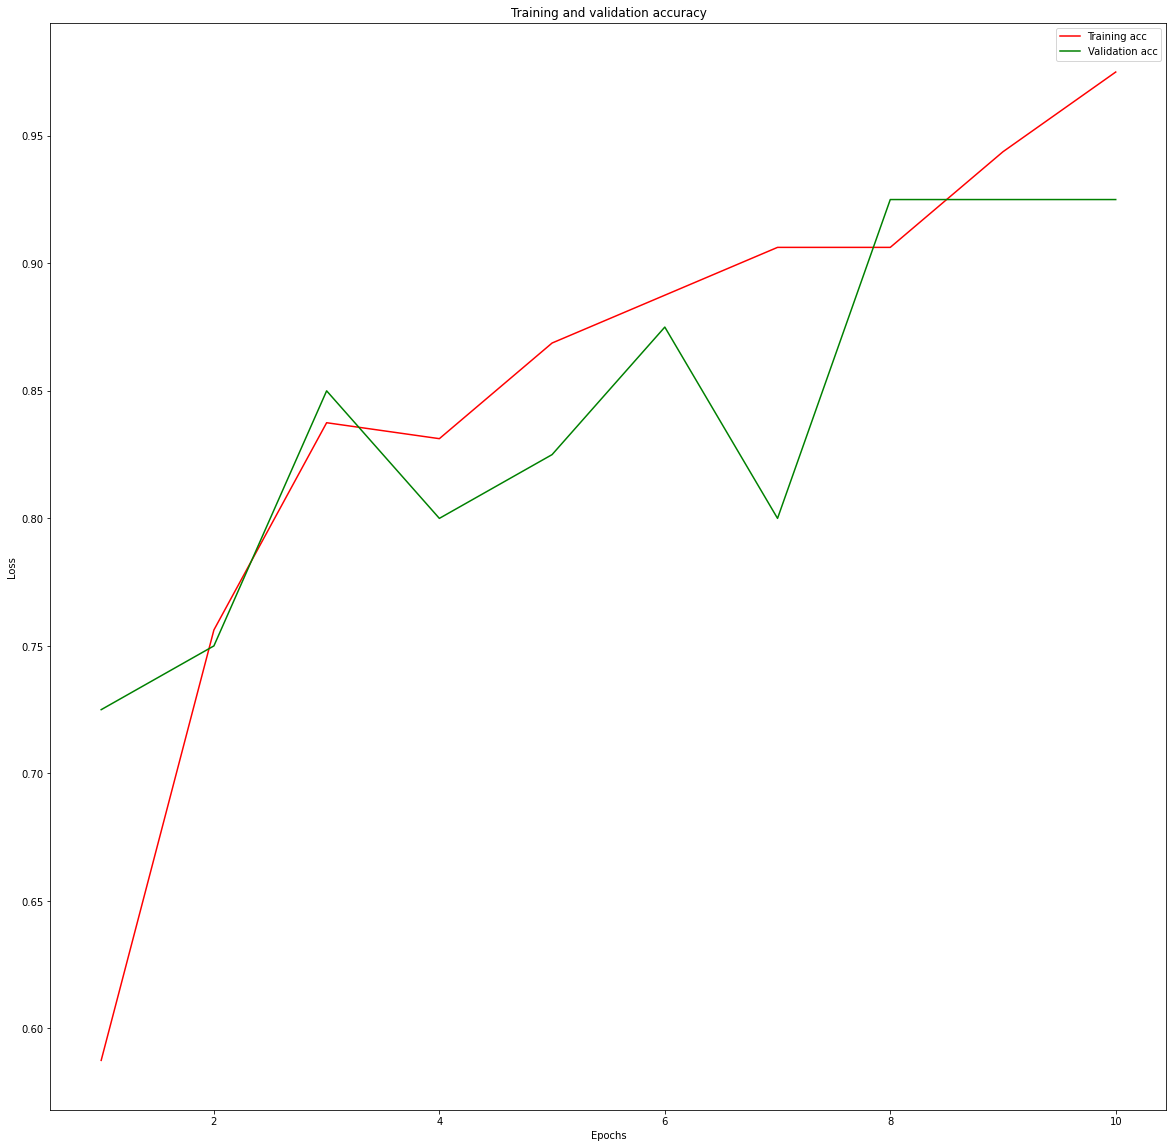

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

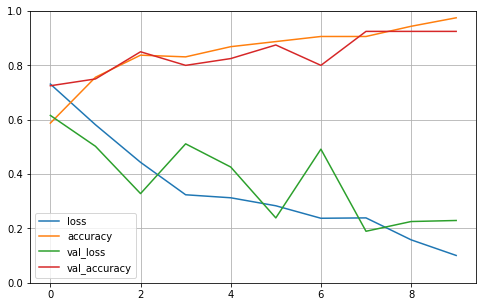

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 41.2 MB/s 


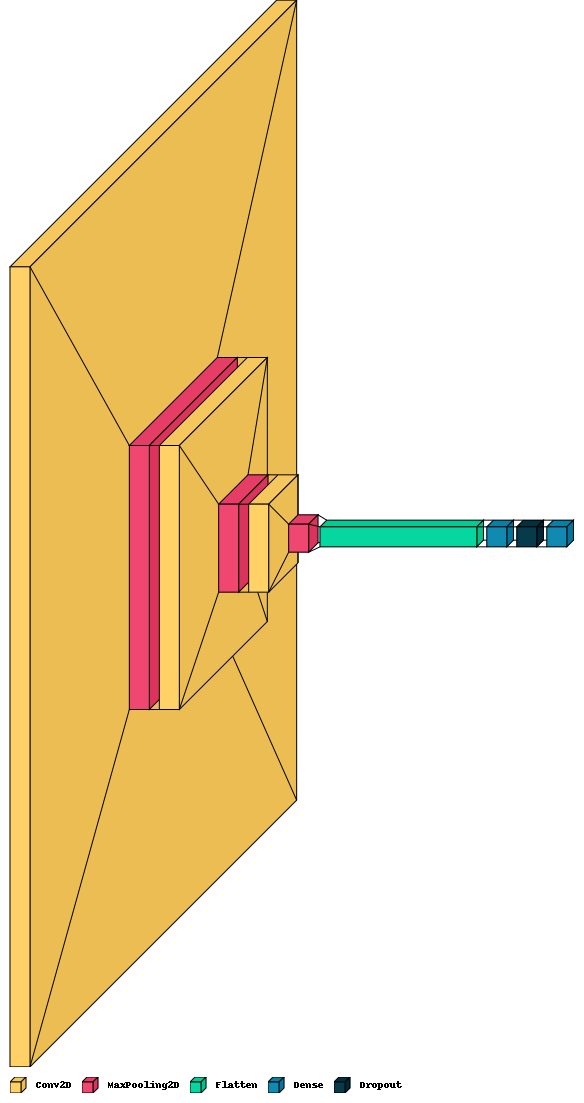

In [ ]:
import visualkeras
visualkeras.layered_view(model)
from tensorflow.keras import layers
from collections import defaultdict
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True,color_map=color_map)

In [ ]:
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [ ]:
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.925000
Precision: 1.000000
Recall: 0.850000
F1 score: 0.918919


In [ ]:
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Cohens kappa: 0.850000
ROC AUC: 0.992500
[[20  0]
 [ 3 17]]


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(X_test)

2/2 [==============================] - 0s 18ms/step


In [ ]:
test_predict = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
result = test_predict.predict(X_test)
for i in range(24):
  print(class_name[int(np.argmax(result[i]))])

2/2 [==============================] - 0s 18ms/step
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid
Non-Venomouse Squid


(40, 200, 200, 3)


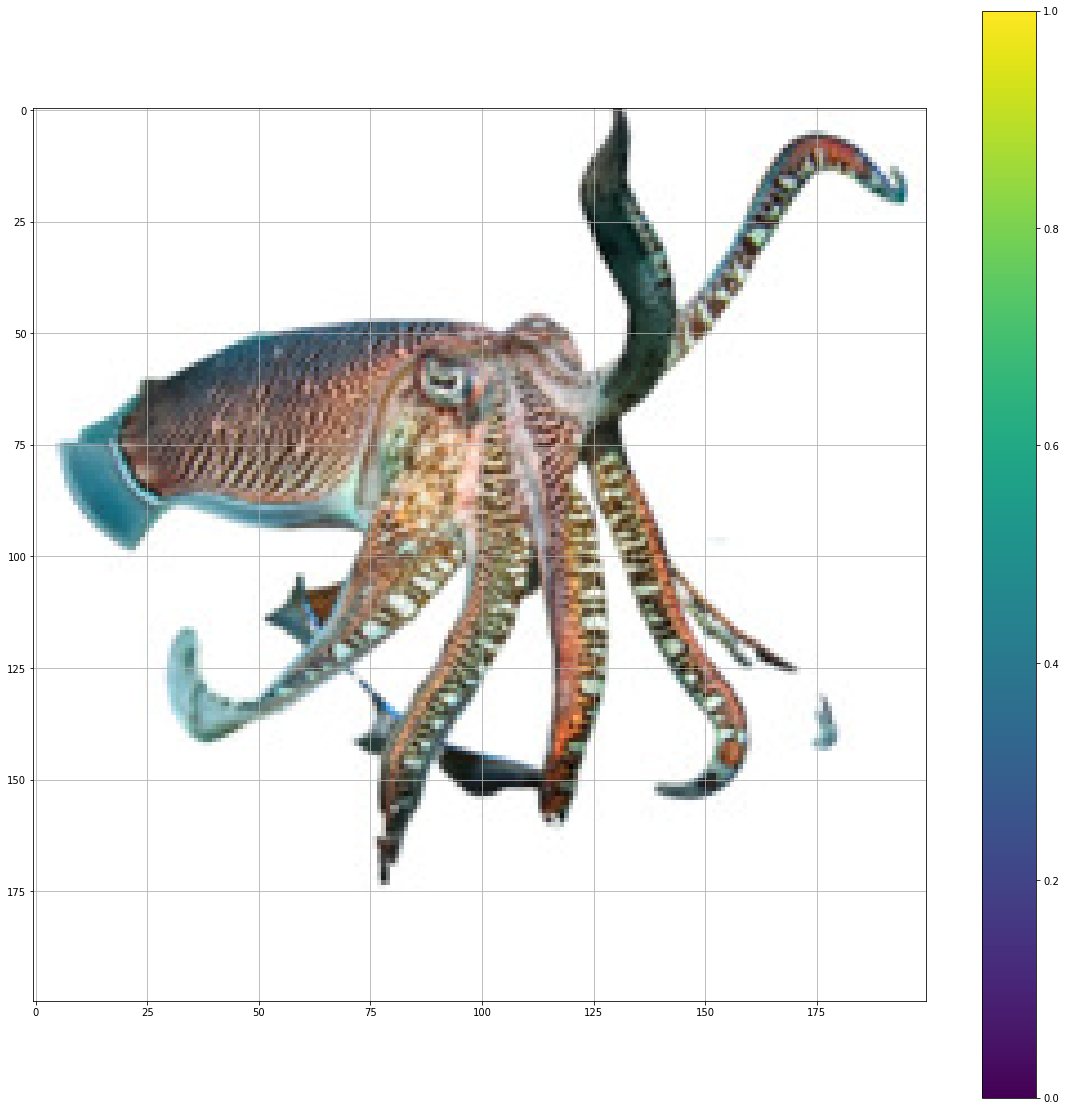

In [ ]:
test_img = np.squeeze(X_test[23])
print(X_test.shape)
plt.figure()
plt.imshow(test_img)
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
# Save Model
#model.save("/content/gdrive/MyDrive/Colab Notebooks/Classifiled_Squid/Octopus.h5")
print("Saved model.")

Saved model.
